In [122]:
import random
from tensorflow.keras.datasets import imdb
import tensorflow
import numpy as np
import os
RANDOM_STATE = 9811
tensorflow.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
os.environ["PYTHONHASHSEED"] = str(RANDOM_STATE) # os

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [123]:
# word_index = imdb.get_word_index()
# word_index

In [124]:

# reverse_word_index = dict([(value, key) for key, value in word_index.items()])
# decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
# decoded_review

In [125]:
import numpy as np
def get_dimension():
    # return max(word_index.values())
    return 10000
# print("max index:",get_dimension(word_index))

def vectorize_sequences(sequences, dimension=get_dimension()):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for word_index  in sequence:
            results[i, word_index] = 1.0
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)
x_train
# import pandas as pd
# pd.DataFrame(x_train).to_csv()

(25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [126]:
y_train = np.asarray(train_labels, dtype=float)
y_test = np.asarray(test_labels, dtype=float)

In [133]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])


In [134]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [135]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [136]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.8205 - accuracy: 0.5105 - val_loss: 0.6825 - val_accuracy: 0.5613
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.7098 - accuracy: 0.5477 - val_loss: 0.6722 - val_accuracy: 0.5078
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6688 - accuracy: 0.5956 - val_loss: 0.6542 - val_accuracy: 0.5316
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6532 - accuracy: 0.6437 - val_loss: 0.6265 - val_accuracy: 0.6111
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6072 - accuracy: 0.6912 - val_loss: 0.5929 - val_accuracy: 0.7549
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5877 - accuracy: 0.7082 - val_loss: 0.5624 - val_accuracy: 0.7994
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5662 - accuracy: 0.7352 - val_loss: 0.5288 - val_accuracy: 0.8306
Epoch 8/20
30

<AxesSubplot:>

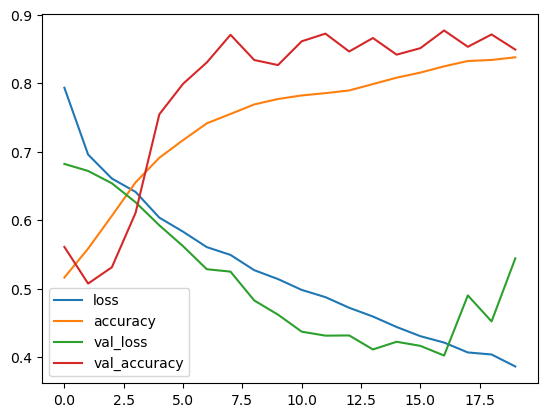

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot()

In [132]:
preds = model.predict(x_val)
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0
from sklearn.metrics import classification_report
print(classification_report(y_val, preds, digits=4))



              precision    recall  f1-score   support

         0.0     0.8902    0.8799    0.8850      4947
         1.0     0.8838    0.8937    0.8887      5053

    accuracy                         0.8869     10000
   macro avg     0.8870    0.8868    0.8869     10000
weighted avg     0.8869    0.8869    0.8869     10000

